In [1]:
import pandas as pd 
import numpy as np
import itertools

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
from sklearn.preprocessing import LabelEncoder  

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
s=StandardScaler()

In [8]:
le=LabelEncoder()

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
df.columns=map(str.lower,df.columns)

In [13]:
df.department=le.fit_transform(df.department)

In [14]:
df.department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [15]:
df.salary=le.fit_transform(df.salary)

In [16]:
df.salary.unique()

array([1, 2, 0])

In [17]:
features =['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary']

In [18]:
v_independent=df[features]

In [19]:
v_independent=s.fit_transform(v_independent)

In [20]:
#v_independent

In [21]:
v_dependent=df.left

In [22]:
X_train, X_test, y_train, y_test=train_test_split(v_independent,v_dependent,train_size=0.9)

In [23]:
#X_test.head()

In [24]:
y_test[:5]

14649    1
7800     0
8099     0
3892     0
8436     0
Name: left, dtype: int64

In [25]:
check= df.loc[12086,['left']]
check

left    1.0
Name: 12086, dtype: float64

In [26]:
model=LogisticRegression()


In [27]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.coef_

array([[-1.04661786,  0.12789188, -0.38405521,  0.20967468,  0.33724041,
        -0.53916139, -0.23736024,  0.12561501,  0.00285203]])

In [29]:
model.intercept_

array([-1.53927253])

In [30]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
model.score(X_train,y_train)

0.7686495295947848

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


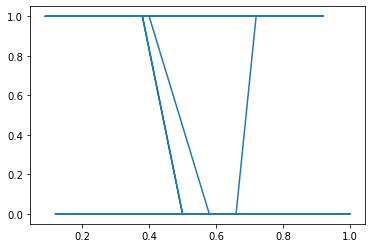

In [33]:
plt.plot(df.satisfaction_level,df.left)

In [34]:
import seaborn as sns

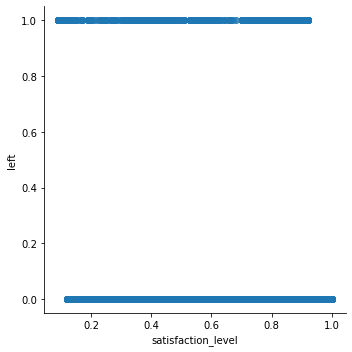

In [35]:
sns.lmplot(data=df,x='satisfaction_level',y='left',fit_reg=False)

In [36]:
y_pp= model.predict_proba(X_train)

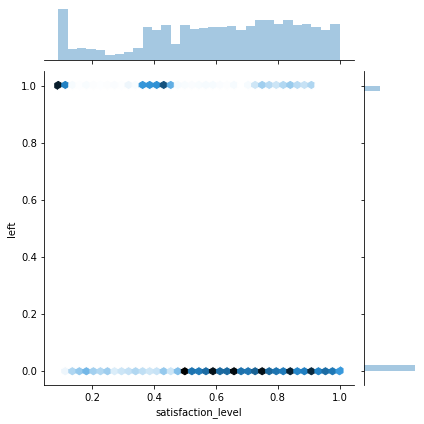

In [37]:
sns.jointplot(data=df,x='satisfaction_level',y='left',kind='hex' )
#plt.scatter(X_train.satisfaction_level,model.predict(X_train))

In [38]:
logistic=model
from statsmodels.genmod.generalized_linear_model import GLM

In [39]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [40]:
satis=s.fit_transform(df[['satisfaction_level','left']])

In [41]:
satis

array([[-0.93649469,  1.788917  ],
       [ 0.75281433,  1.788917  ],
       [-2.02247906,  1.788917  ],
       ...,
       [-0.97671633,  1.788917  ],
       [-2.02247906,  1.788917  ],
       [-0.97671633,  1.788917  ]])

In [42]:
X = s.fit(X).transform(X.astype(float))

NameError: name 'X' is not defined

In [ ]:
#df['satisfaction_level']=df['satisfaction_level'].apply('int32')
#df['left']=df['left'].apply('int32')
small_data=df[['satisfaction_level','left']]
#small_data.astype(int)

In [ ]:
small_data.info()

In [ ]:
df.info()

In [ ]:
#df.left=df.left.astype('int32')
#df.satisfaction_level=df.satisfaction_level.astype('int32')

In [ ]:
df.head()

In [ ]:
sns.regplot(x='satisfaction_level', y='left', data=df)

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

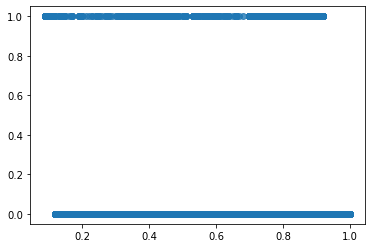

In [44]:
sns.regplot(x='satisfaction_level', y='left', data=df, logistic=True)

In [ ]:
W = s.fit(w).transform(w.astype(float))

In [ ]:
df.columns

In [ ]:
w=df[features].values
w[0:2]

In [ ]:
q=df['left'].values
q

In [43]:
import seaborn as sns
sns.__version__

'0.10.0'

In [48]:
import sys
sys.maxsize > 2**32 

False